# General Preparation

In [1]:
import os
os.chdir("/home/jovyan/work")

# Control Task 4.1

[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


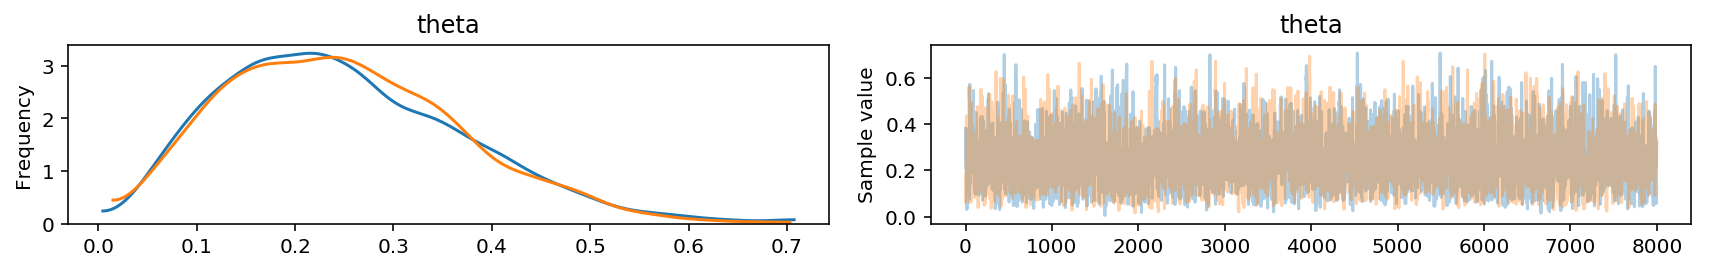

In [9]:
# %load src/4-01-coin-toss.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy.stats import bernoulli

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
y = bernoulli(0.22).rvs(10)
print(y)

# Inferece
with pm.Model() as model:
    theta = pm.Beta("theta", alpha=1, beta=1)
    throw = pm.Bernoulli("throw", theta, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis(), progressbar=False)

pm.traceplot(trace[2000:])
plt.savefig("./results/4-01-coin-toss.png")

[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


[0 1 0 0 0 0 0 1 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
The number of effective samples is smaller than 25% for some parameters.


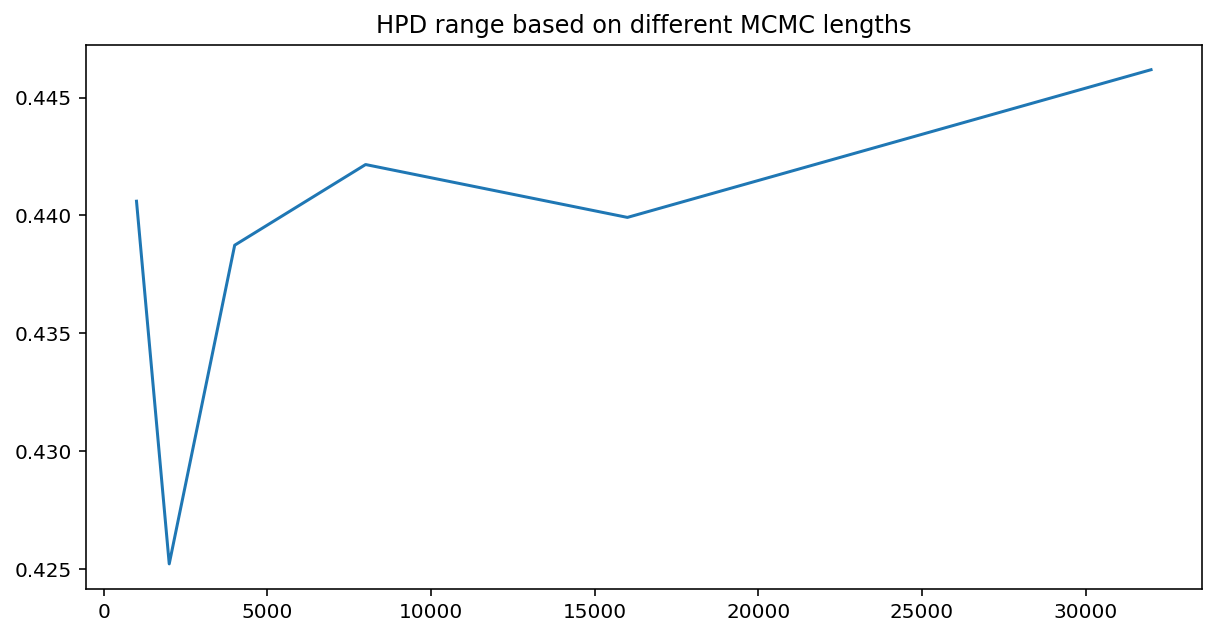

In [44]:
# %load src/4-04-hpd-chain-length.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import bernoulli

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
y = bernoulli(0.22).rvs(10)
print(y)
chains = 1000 * 2**np.arange(6)
cols = ['mean', 'sd', 'mc_error', 'hpd_2.5', 'hpd_97.5', 'n_eff', 'Rhat']
df_summaries = pd.DataFrame(columns=cols)

# Inferece
for chain in chains:
    with pm.Model() as model:
        theta = pm.Beta("theta", alpha=1, beta=1)
        throw = pm.Bernoulli("throw", theta, observed=y)
        trace = pm.sample(chain, step=pm.Metropolis(), progressbar=False)
        df_summaries = df_summaries.append(pm.summary(trace))

# Calculate the HPD interval range
df_summaries["hpd"] = df_summaries["hpd_97.5"] - df_summaries["hpd_2.5"]

plt.plot(chains, df_summaries["hpd"])
plt.title("HPD range based on different MCMC lengths")
plt.savefig("./results/4-04-hpd-chain-length.png")

# Control Task 4.5

INFO (theano.gof.compilelock): Refreshing lock /home/jovyan/.theano/compiledir_Linux-4.9-linuxkit-x86_64-with-debian-stretch-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:25<00:00, 430.81draws/s]
There were 116 divergences after tuning. Increase `target_accept` or reparameterize.
There were 164 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


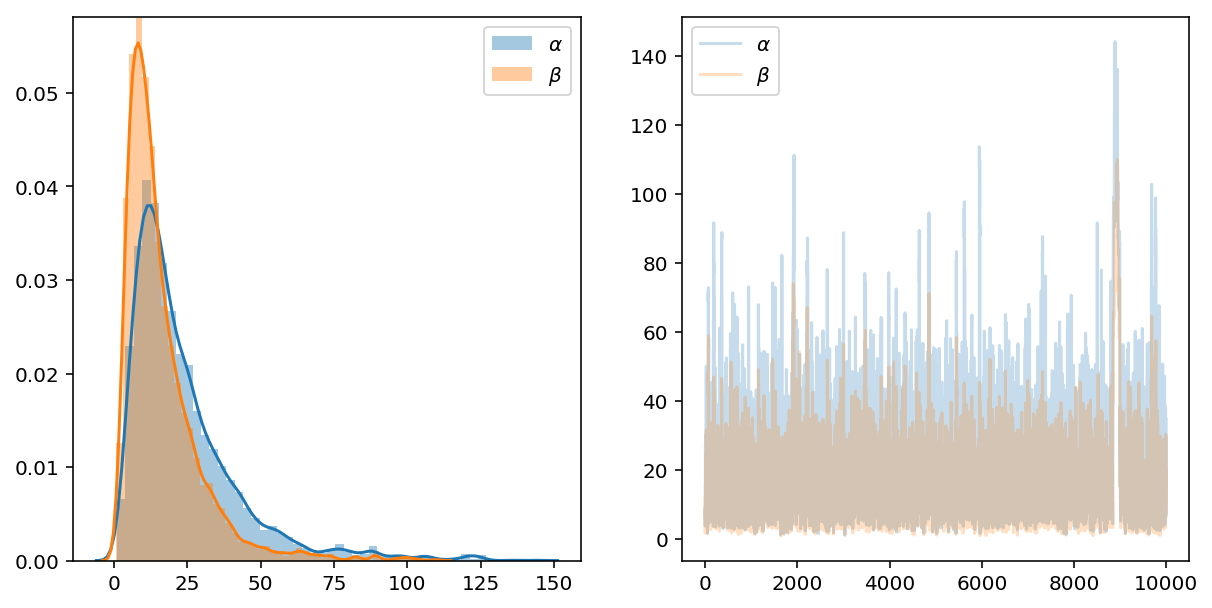

In [82]:
# %load src/4-05-hierarhical-posterior.py
# Imports
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import bernoulli
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
samples = np.repeat(25, 4)
hits = np.repeat(15, 4)
data = [s for i,j in zip(samples, hits)
         for s in random.sample([1]*j+[0]*(i-j), 25)] 
grp = np.repeat(np.arange(4), 25)

# Sampling
with pm.Model() as model:
    alpha = pm.HalfCauchy("alpha", beta=10)
    beta = pm.HalfCauchy("beta", beta=10)
    theta = pm.Beta("theta", alpha=alpha, beta=beta, shape=4)
    y = pm.Bernoulli("y", p=theta[grp], observed=data)
    trace = pm.sample(5000)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.distplot(trace["alpha"], ax=ax[0], label=r"$\alpha$")
sns.distplot(trace["beta"], ax=ax[0], label=r"$\beta$")
ax[1].plot(range(len(trace["alpha"])), trace["alpha"], alpha=.25, label=r"$\alpha$")
ax[1].plot(range(len(trace["beta"])), trace["beta"], alpha=.25, label=r"$\beta$")
ax[0].legend()
ax[1].legend()
plt.savefig("./results/4-05-hierarhical-posterior.png")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:07<00:00, 1435.39draws/s]


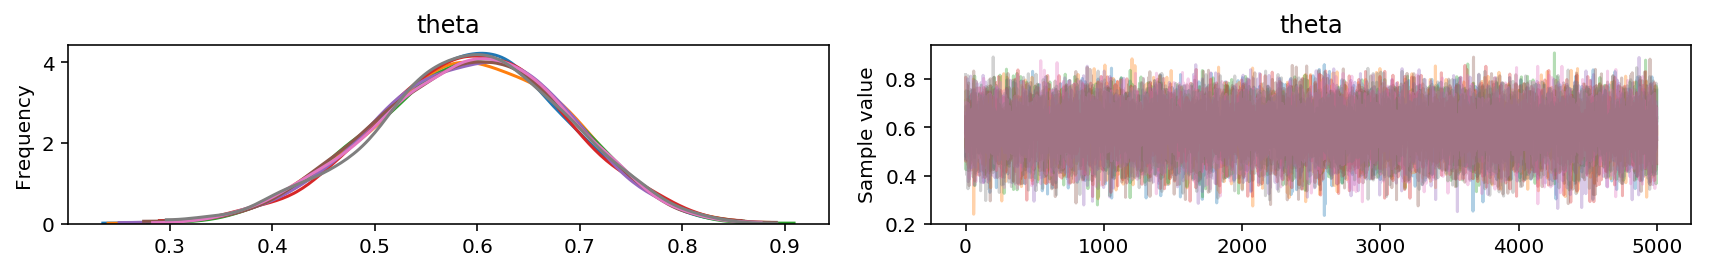

In [88]:
# %load src/4-06-non-hierarhical-posterior.py
# Sampling
with pm.Model() as model:
    theta = pm.Beta("theta", alpha=1, beta=1, shape=4)
    y = pm.Bernoulli("y", p=theta[grp], observed=data)
    trace = pm.sample(5000)

# Plotting
pm.traceplot(trace)
plt.savefig("./results/4-06-non-hierarhical-posterior.png")

# Control Task 4.7

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
100%|██████████| 100/100 [00:00<00:00, 601.73it/s]


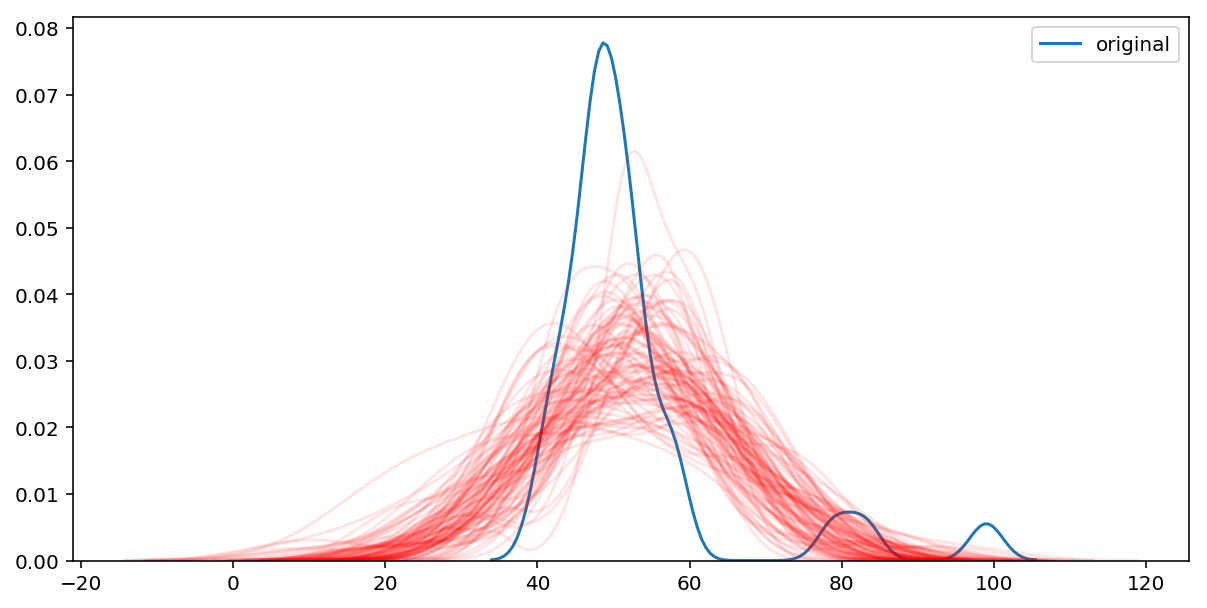

In [122]:
# %load src/4-07-outlier.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
data = norm(50, 5).rvs(30)
data = np.append(data, [79, 83, 99])

# Sampling
with pm.Model() as model:
    mu = pm.Uniform("mu", 0, 100)
    sigma = pm.HalfNormal("sigma", 5)
    y = pm.Normal("y", mu=mu, sd=sigma, observed=data)
    trace = pm.sample(5000)

sns.kdeplot(data, label="original")
preds = pm.sample_posterior_predictive(trace, samples=100, model=model)["y"]
for p in preds:
    sns.kdeplot(p, alpha=.1, color="red")
plt.savefig("./results/4-07-outlier.png")

# Control Task 4.8

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu, nu]
100%|██████████| 100/100 [00:00<00:00, 901.75it/s]


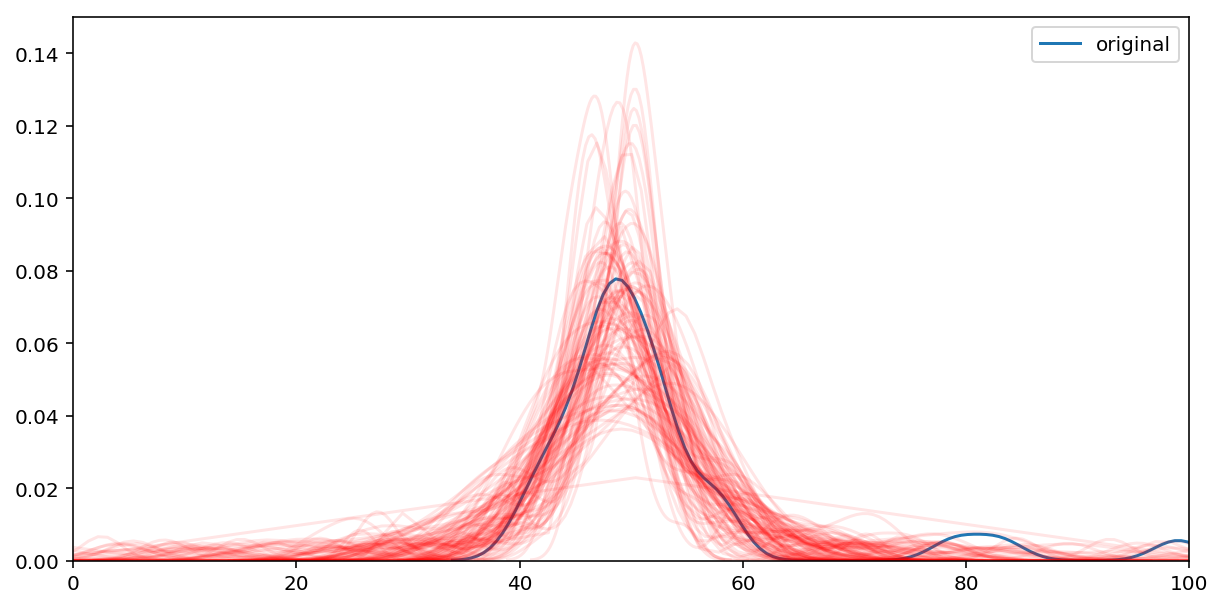

In [3]:
# %load src/4-08-robust-outlier.py
# Imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
data = norm(50, 5).rvs(30)
data = np.append(data, [79, 83, 99])

# Sampling
with pm.Model() as model:
    nu = pm.Exponential("nu", lam=1/10)
    mu = pm.Uniform("mu", 0, 100)
    sigma = pm.HalfNormal("sigma", 5)
    y = pm.StudentT("y", mu=mu, sd=sigma, nu=nu, observed=data)
    trace = pm.sample(5000)

sns.kdeplot(data, label="original")
preds = pm.sample_posterior_predictive(trace, samples=100, model=model)["y"]
for p in preds:
    sns.kdeplot(p, alpha=.1, color="red")
plt.xlim((0, 100))
plt.savefig("./results/4-08-robust-outlier.png")

# Control Task 4.9

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:06<00:00, 1600.02draws/s]
The acceptance probability does not match the target. It is 0.882363727799, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 100/100 [00:00<00:00, 681.84it/s]


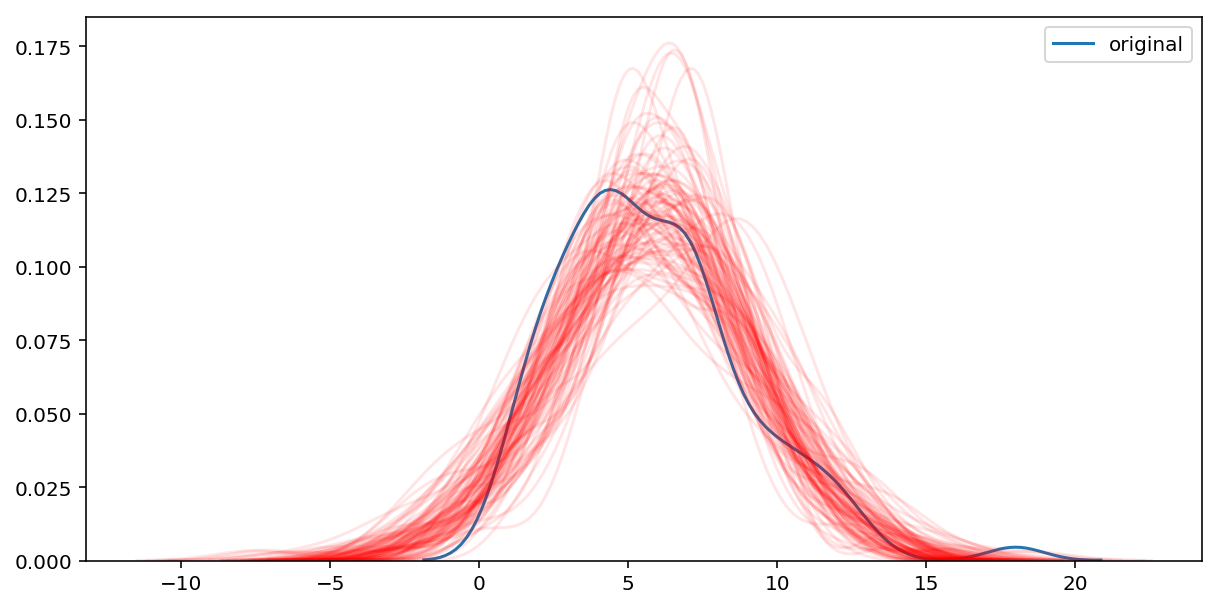

In [13]:
# %load src/4-09-times-magazine-outlier.py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
df = pd.read_csv("./data/times_magazine.csv")

# Sampling
with pm.Model() as model:
    mu = pm.Uniform("mu", 0, 18)
    sigma = pm.HalfNormal("sigma", 3)
    y = pm.Normal("y", mu=mu, sd=sigma, observed=df.Female)
    trace = pm.sample(5000)

sns.kdeplot(df.Female, label="original")
preds = pm.sample_posterior_predictive(trace, samples=100, model=model)["y"]
for p in preds:
    sns.kdeplot(p, alpha=.1, color="red")
plt.savefig("./results/4-09-times-outlier.png")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu, nu]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:09<00:00, 1137.66draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
100%|██████████| 100/100 [00:00<00:00, 902.67it/s]


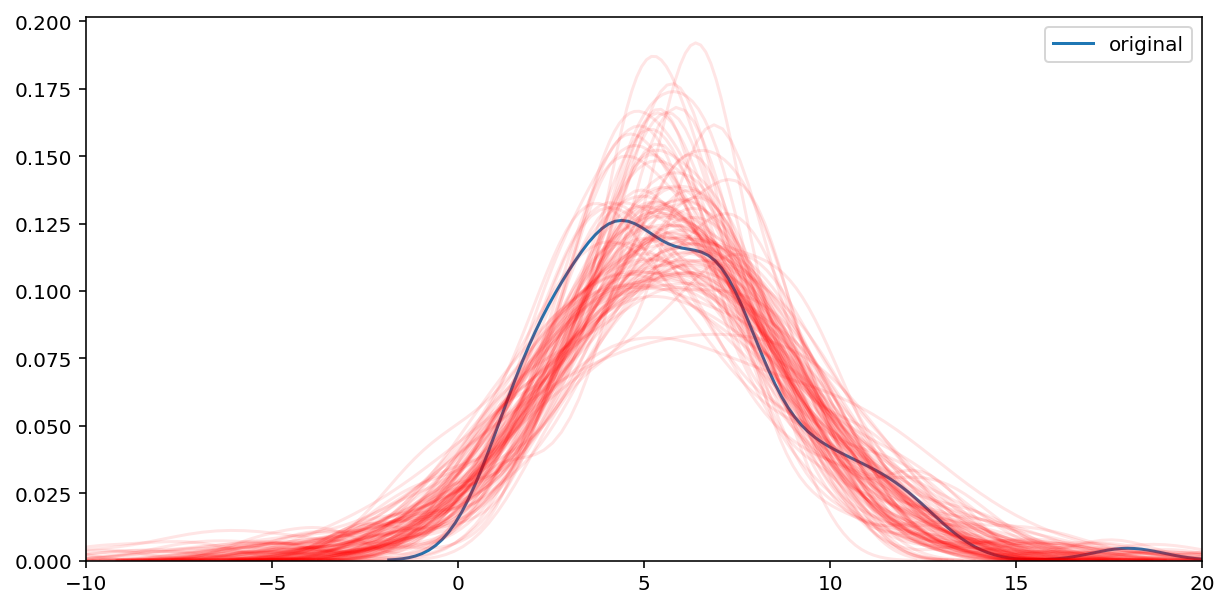

In [18]:
# %load src/4-09-times-magazine-robust.py
# Sampling
with pm.Model() as model:
    nu = pm.Exponential("nu", 1/10)
    mu = pm.Uniform("mu", 0, 18)
    sigma = pm.HalfNormal("sigma", 3)
    y = pm.StudentT("y", mu=mu, sd=sigma, nu=nu, observed=df.Female)
    trace = pm.sample(5000)

sns.kdeplot(df.Female, label="original")
preds = pm.sample_posterior_predictive(trace, samples=100, model=model)["y"]
for p in preds:
    sns.kdeplot(p, alpha=.1, color="red")
plt.xlim(-10, 20)
plt.savefig("./results/4-09-times-robust.png")

# Control Task 4.11

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [e]
>Metropolis: [b_1]
>Metropolis: [b_0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:08<00:00, 2608.24draws/s]
The number of effective samples is smaller than 10% for some parameters.


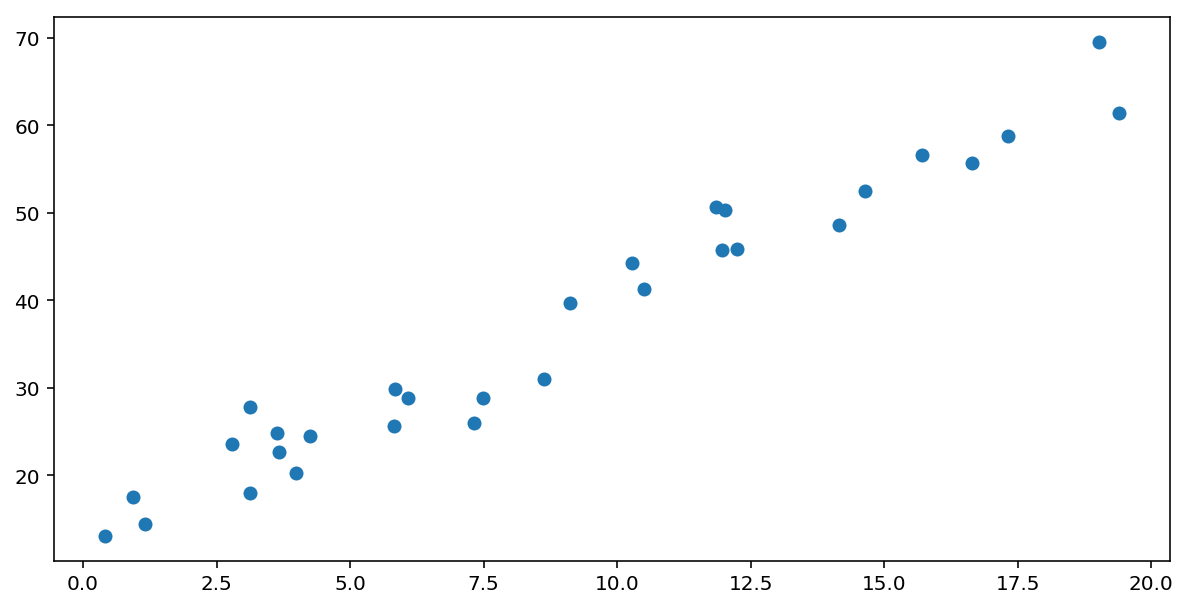

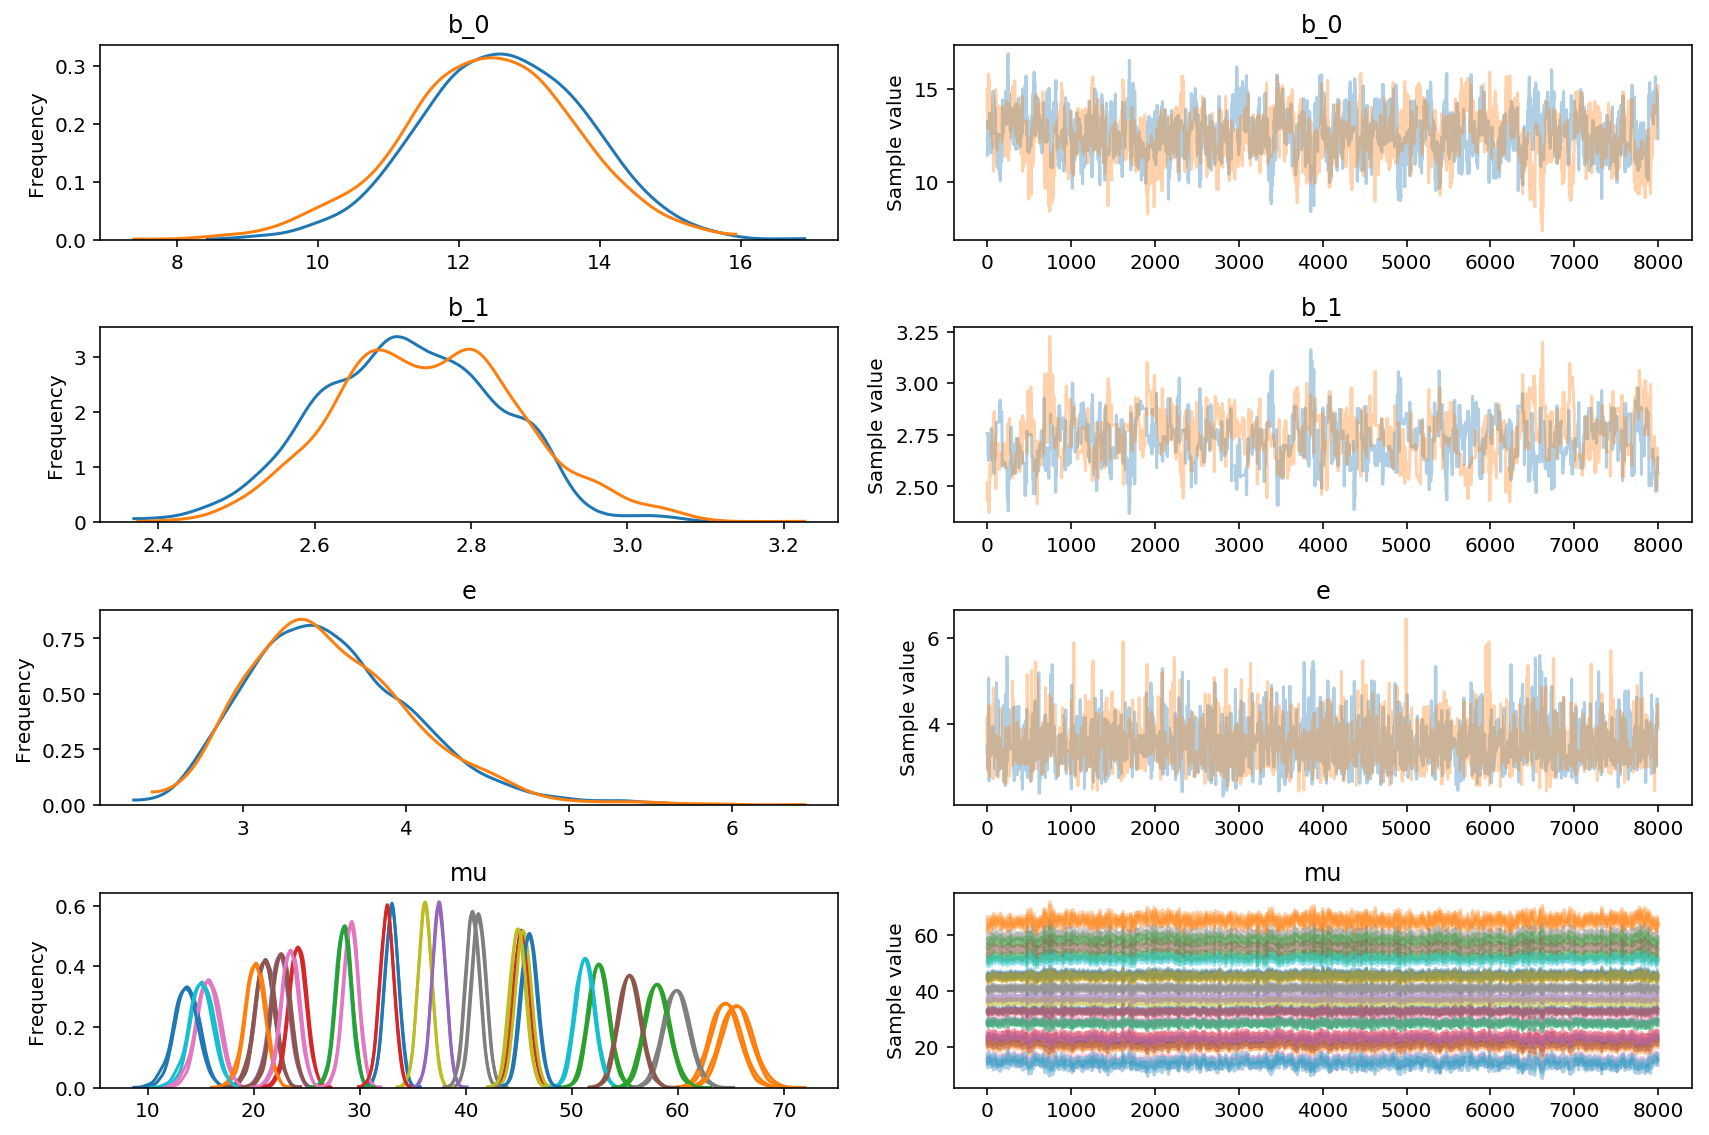

In [28]:
# %load src/4-11-regression-uniform.py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm, uniform
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
x = uniform(0, 20).rvs(30)
eps = norm(0, 4).rvs(30)
y = 11 + 3*x + eps
plt.scatter(x, y);

# Sampling
with pm.Model() as model:
    b_0 = pm.Normal("b_0", mu=0, sd=10)
    b_1 = pm.Normal("b_1", mu=0, sd=2)
    e = pm.Uniform("e", 0, 100)
    mu = pm.Deterministic("mu", b_0 + b_1*x)
    Y = pm.Normal("Y", mu=mu, sd=e, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis())

pm.traceplot(trace[2000:]);
plt.savefig("./results/4-11-regression-uniform.png")

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [e]
>Metropolis: [b_1]
>Metropolis: [b_0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:08<00:00, 2460.23draws/s]
The number of effective samples is smaller than 10% for some parameters.


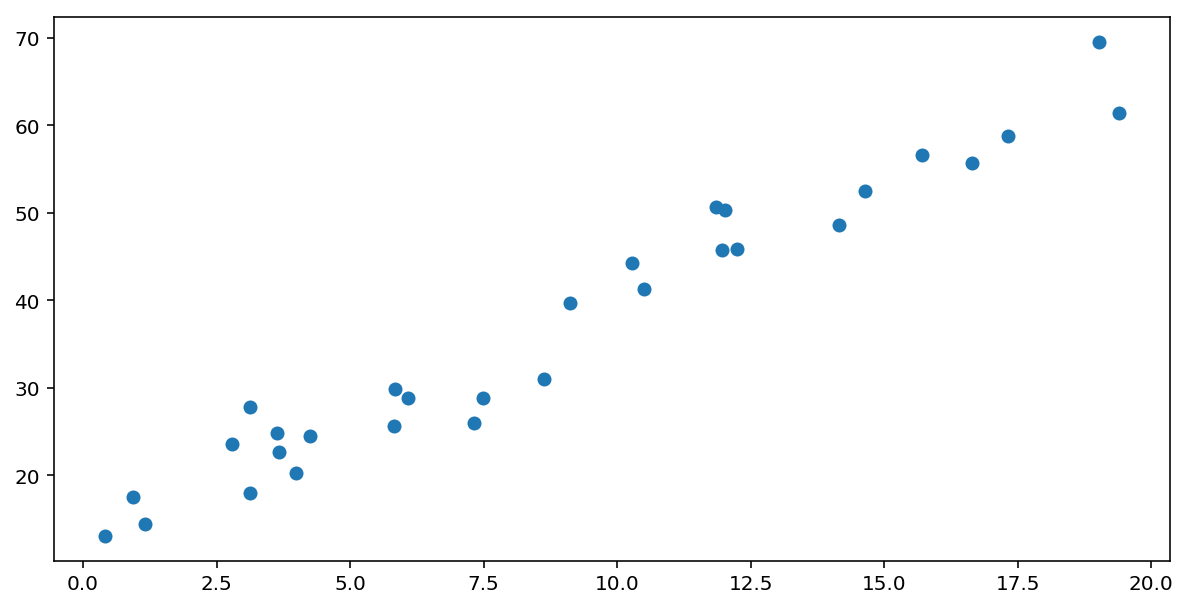

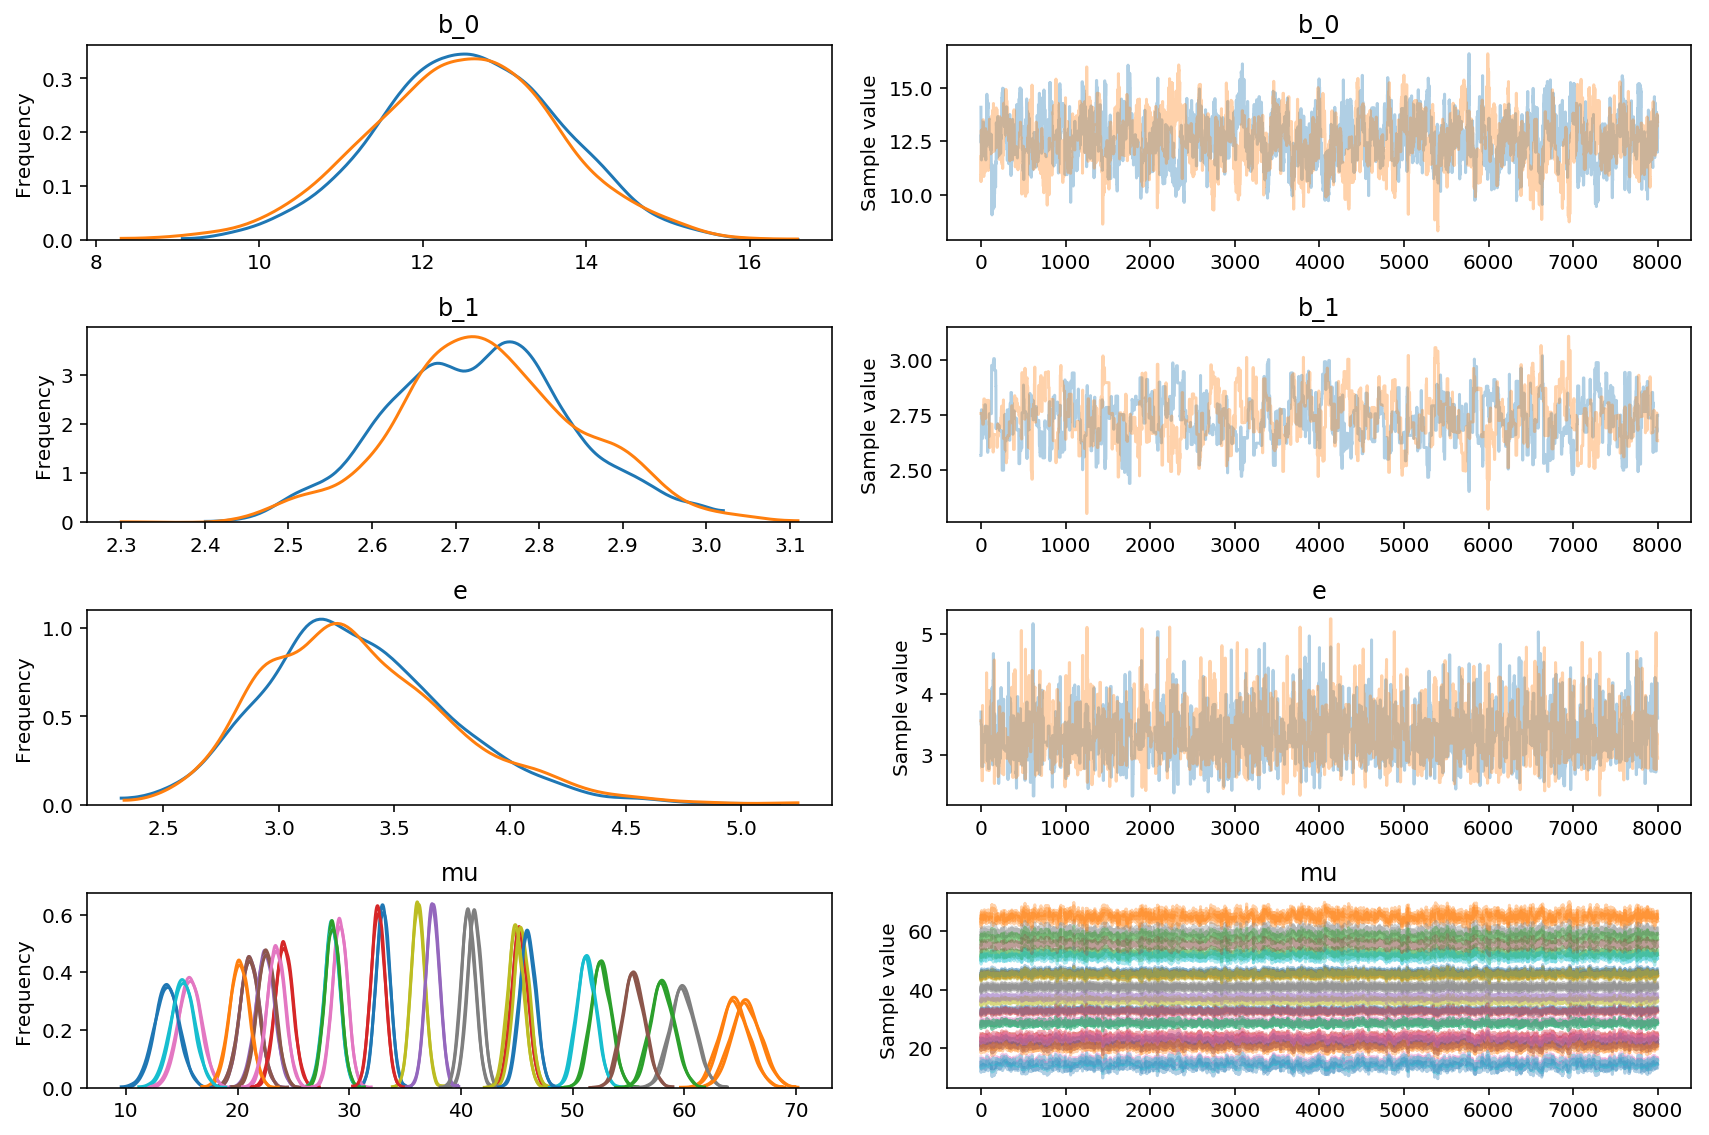

In [31]:
# %load src/4-11-regression-half-normal.py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm, uniform
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
x = uniform(0, 20).rvs(30)
eps = norm(0, 4).rvs(30)
y = 11 + 3*x + eps
plt.scatter(x, y);

# Sampling
with pm.Model() as model:
    b_0 = pm.Normal("b_0", mu=0, sd=10)
    b_1 = pm.Normal("b_1", mu=0, sd=2)
    e = pm.HalfNormal("e", sd=2)
    mu = pm.Deterministic("mu", b_0 + b_1*x)
    Y = pm.Normal("Y", mu=mu, sd=e, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis())

pm.traceplot(trace[2000:]);
plt.savefig("./results/4-11-regression-half-normal.png")

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [e]
>Metropolis: [b_1]
>Metropolis: [b_0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:08<00:00, 2471.65draws/s]
The number of effective samples is smaller than 10% for some parameters.


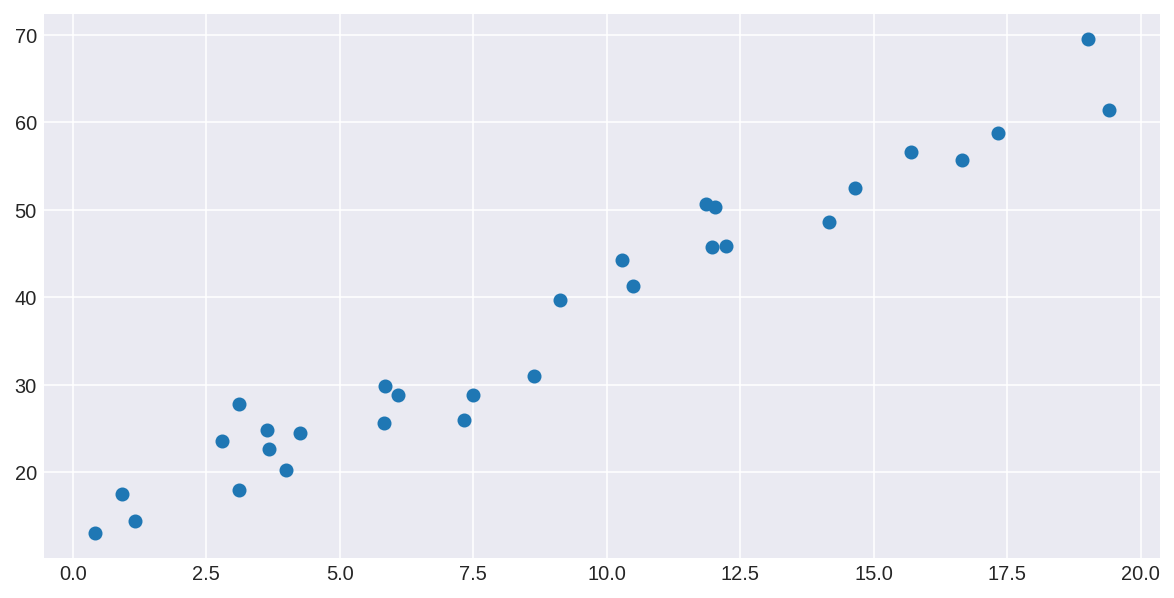

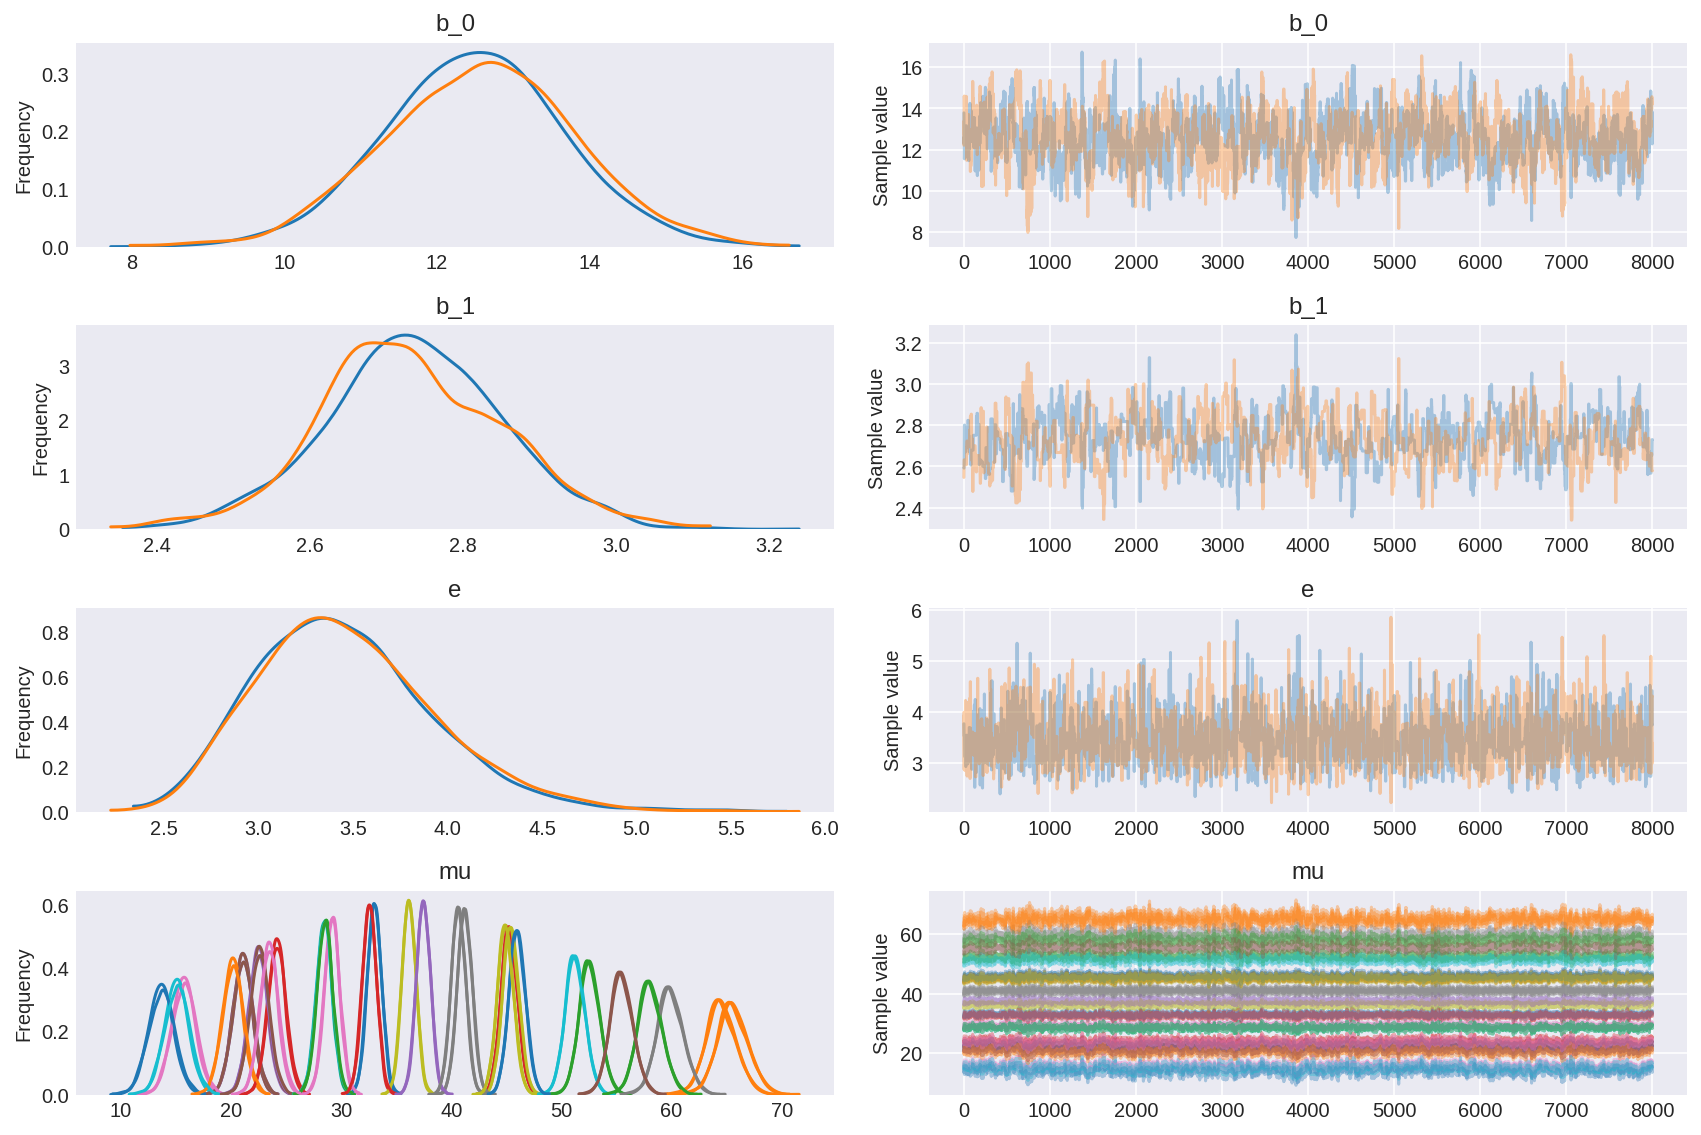

In [38]:
# %load src/4-11-regression-half-cauchy.py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm, uniform
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
x = uniform(0, 20).rvs(30)
eps = norm(0, 4).rvs(30)
y = 11 + 3*x + eps
plt.scatter(x, y);

# Sampling
with pm.Model() as model:
    b_0 = pm.Normal("b_0", mu=0, sd=10)
    b_1 = pm.Normal("b_1", mu=0, sd=2)
    e = pm.HalfCauchy("e", 2)
    mu = pm.Deterministic("mu", b_0 + b_1*x)
    Y = pm.Normal("Y", mu=mu, sd=e, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis())

pm.traceplot(trace[2000:]);
plt.savefig("./results/4-11-regression-half-cauchy.png")

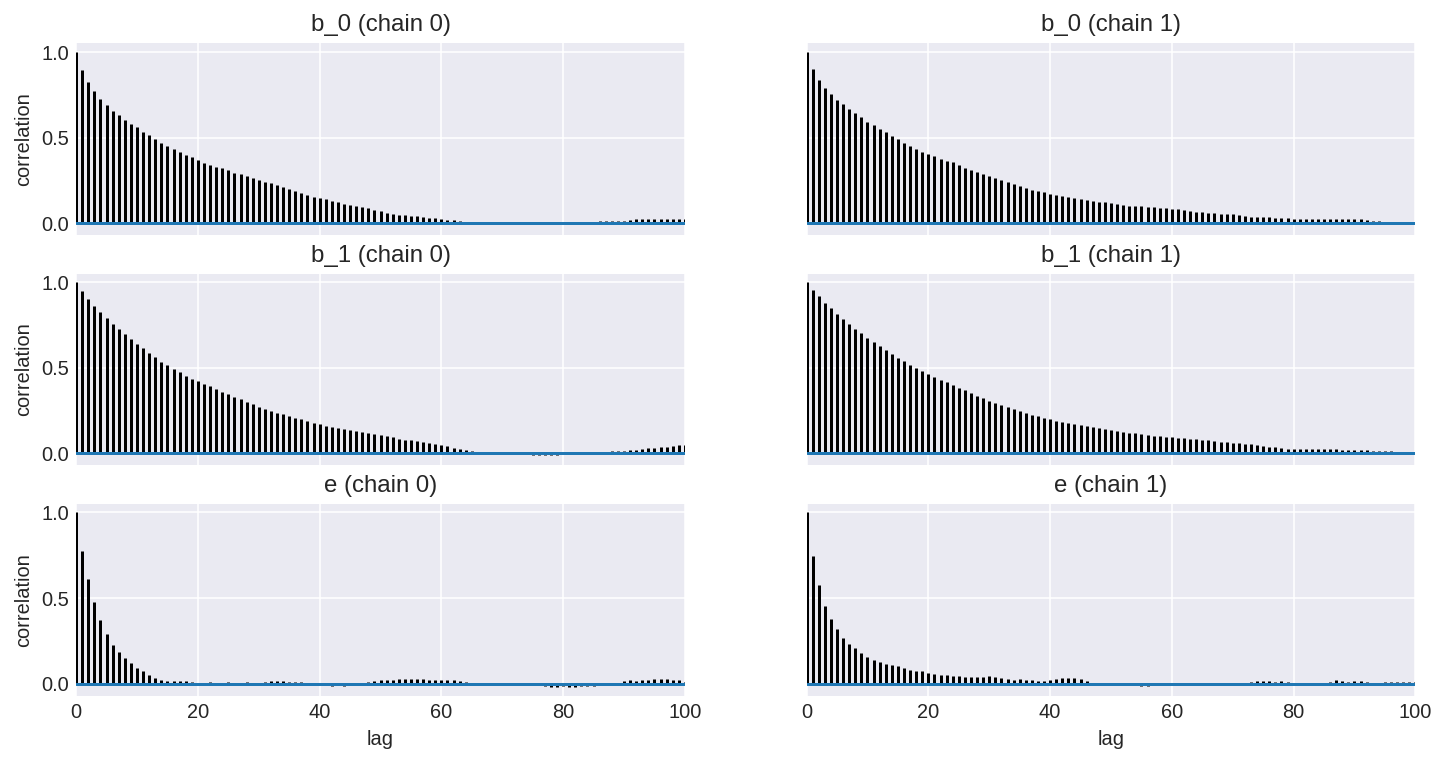

In [40]:
pm.autocorrplot(trace, varnames=["b_0", "b_1", "e"]);

# Control Task 4.12

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [e]
>Metropolis: [b_1]
>Metropolis: [b_0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:08<00:00, 2384.77draws/s]
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [e, b_1, b_0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:23<00:00, 904.99draws/s] 
The acceptance probability does not match the target. It is 0.884956736953, but should be close to 0.8. Try to increase the number of tuning steps.


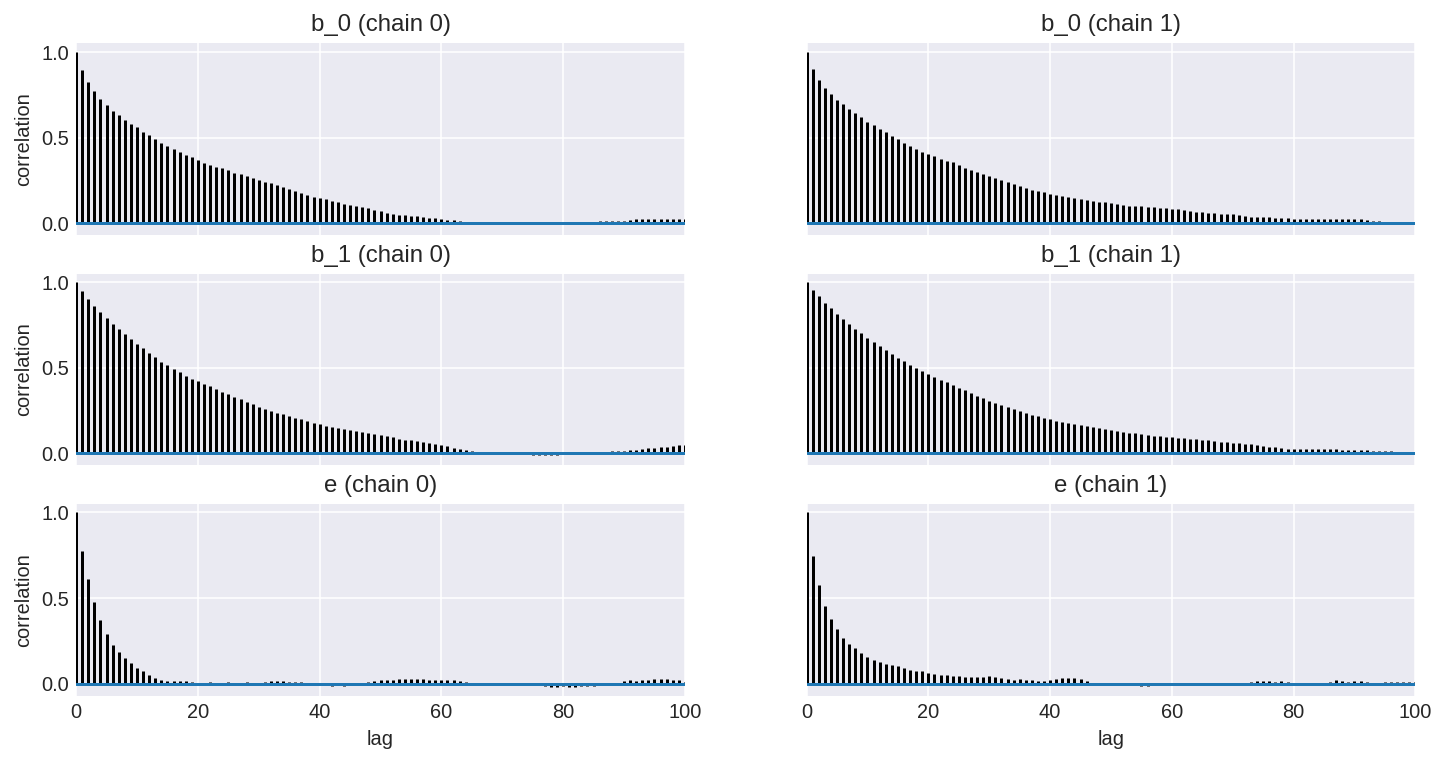

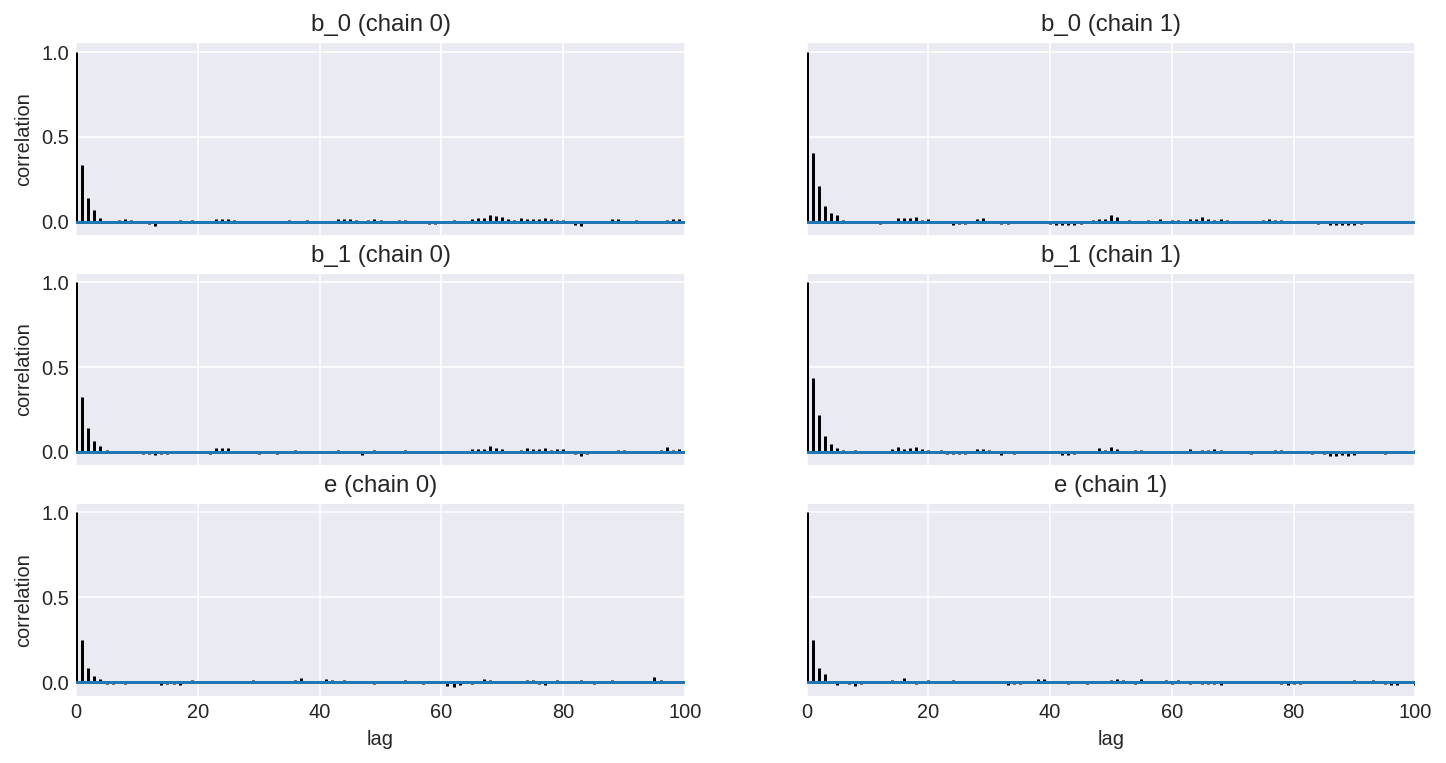

In [46]:
# %load src/4-12-autocorrelation-metropolis-nuts.py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm, uniform
import seaborn as sns

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
np.random.seed(42)

# Prepare the data
x = uniform(0, 20).rvs(30)
eps = norm(0, 4).rvs(30)
y = 11 + 3*x + eps

# Sampling w/ Metropolis
with pm.Model() as model:
    b_0 = pm.Normal("b_0", mu=0, sd=10)
    b_1 = pm.Normal("b_1", mu=0, sd=2)
    e = pm.HalfCauchy("e", 2)
    mu = pm.Deterministic("mu", b_0 + b_1*x)
    Y = pm.Normal("Y", mu=mu, sd=e, observed=y)
    trace = pm.sample(10000, step=pm.Metropolis())
pm.autocorrplot(trace, varnames=["b_0", "b_1", "e"]);
plt.savefig("./results/4-12-autocorrelation-metropolis.png")

# Sampling w/ NUTS
with pm.Model() as model:
    b_0 = pm.Normal("b_0", mu=0, sd=10)
    b_1 = pm.Normal("b_1", mu=0, sd=2)
    e = pm.HalfCauchy("e", 2)
    mu = pm.Deterministic("mu", b_0 + b_1*x)
    Y = pm.Normal("Y", mu=mu, sd=e, observed=y)
    trace = pm.sample(10000)
pm.autocorrplot(trace, varnames=["b_0", "b_1", "e"]);
plt.savefig("./results/4-12-autocorrelation-nuts.png")